<a href="https://colab.research.google.com/github/johndejohn/Circle-Browser-blockchain/blob/master/Copy_of_Copy_of_ultralytics_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://storage.googleapis.com/ultralytics/logo/logoname1000.png" width="150">

This notebook contains software developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov3 and https://www.ultralytics.com.





In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


Clone repository and download COCO 2014 dataset (20GB):

In [0]:
!git clone https://github.com/johndejohn/yolov3.git  # clone
!bash yolov3/data/get_coco_dataset_gdrive.sh  # copy COCO2014 dataset (19GB)
%cd yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 8029 (delta 24), reused 24 (delta 10), pack-reused 7978
Receiving objects: 100% (8029/8029), 7.97 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (5537/5537), done.
bash: yolov3/data/get_coco_dataset_gdrive.sh: No such file or directory
/content/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3


Run `detect.py` to perform inference on images in `data/samples` folder:

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1630      0 --:--:-- --:--:-- --:--:--  1630
100  240M    0  240M    0     0  86.5M      0 --:--:--  0:00:02 --:--:--  108M
image 1/4 data/samples/D0F7CB29-5A7D-49FA-B576-960D1C27B9C9.jpeg: 288x416 7 persons, 2 cars, 2 trucks, 1 traffic lights, 4 backpacks, Done. (0.045s)
image 2/4 data/samples/F718583B-C29C-4F28-AB3D-8B9D19B6E32C.jpeg: 288x416 2 persons, 1 buss, 9 trucks, 1 boats, Done. (0.034s)
image 3/4 data/samples/bus.jpg: 4

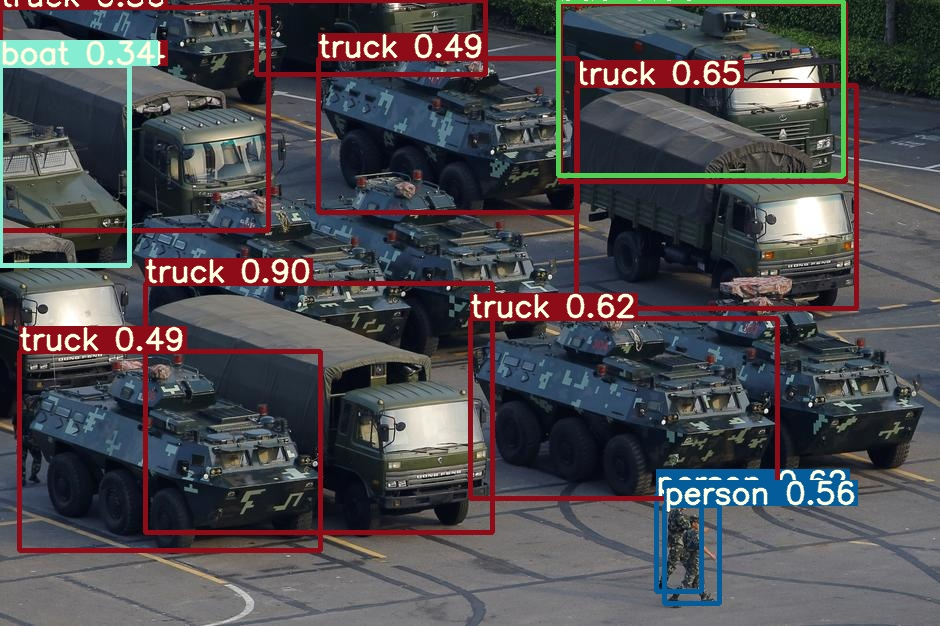

In [0]:
!python3 detect.py
Image(filename='output/F718583B-C29C-4F28-AB3D-8B9D19B6E32C.jpeg', width=600)

Run `train.py` to train YOLOv3-SPP starting from a darknet53 backbone:

In [0]:
!python3 train.py --data data/coco_64img.data --img-size 320 --epochs 3 --nosave

Namespace(accumulate=4, adam=False, arc='default', batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/coco_64img.data', device='', epochs=3, evolve=False, img_size=[320], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Traceback (most recent call last):
  File "train.py", line 434, in <module>
    train()  # train normally
  File "train.py", line 70, in train
    data_dict = parse_data_cfg(data)
  File "/content/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/utils/parse_config.py", line 59, in parse_data_cfg
    with open(path, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'data/coco_64img.data'


Run `test.py` to evaluate the performance of a trained darknet or PyTorch model:

In [0]:
!python3 test.py --data data/coco.data --save-json --img-size 416  # 0.565 mAP

Namespace(batch_size=32, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/coco.data', device='', img_size=416, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Traceback (most recent call last):
  File "test.py", line 236, in <module>
    opt.single_cls)
  File "test.py", line 48, in test
    data = parse_data_cfg(data)
  File "/content/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/utils/parse_config.py", line 59, in parse_data_cfg
    with open(path, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'data/coco.data'


Reproduce tutorial training runs and plot training results:

Namespace(accumulate=1, adam=False, arc='default', batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/coco_16img.data', device='', epochs=273, evolve=False, img_size=[416], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Traceback (most recent call last):
  File "train.py", line 434, in <module>
    train()  # train normally
  File "train.py", line 70, in train
    data_dict = parse_data_cfg(data)
  File "/content/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/utils/parse_config.py", line 59, in parse_data_cfg
    with open(path, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'data/coco_16img.data'
Namespace(accumulate=1, adam=False, arc='default', batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', dat

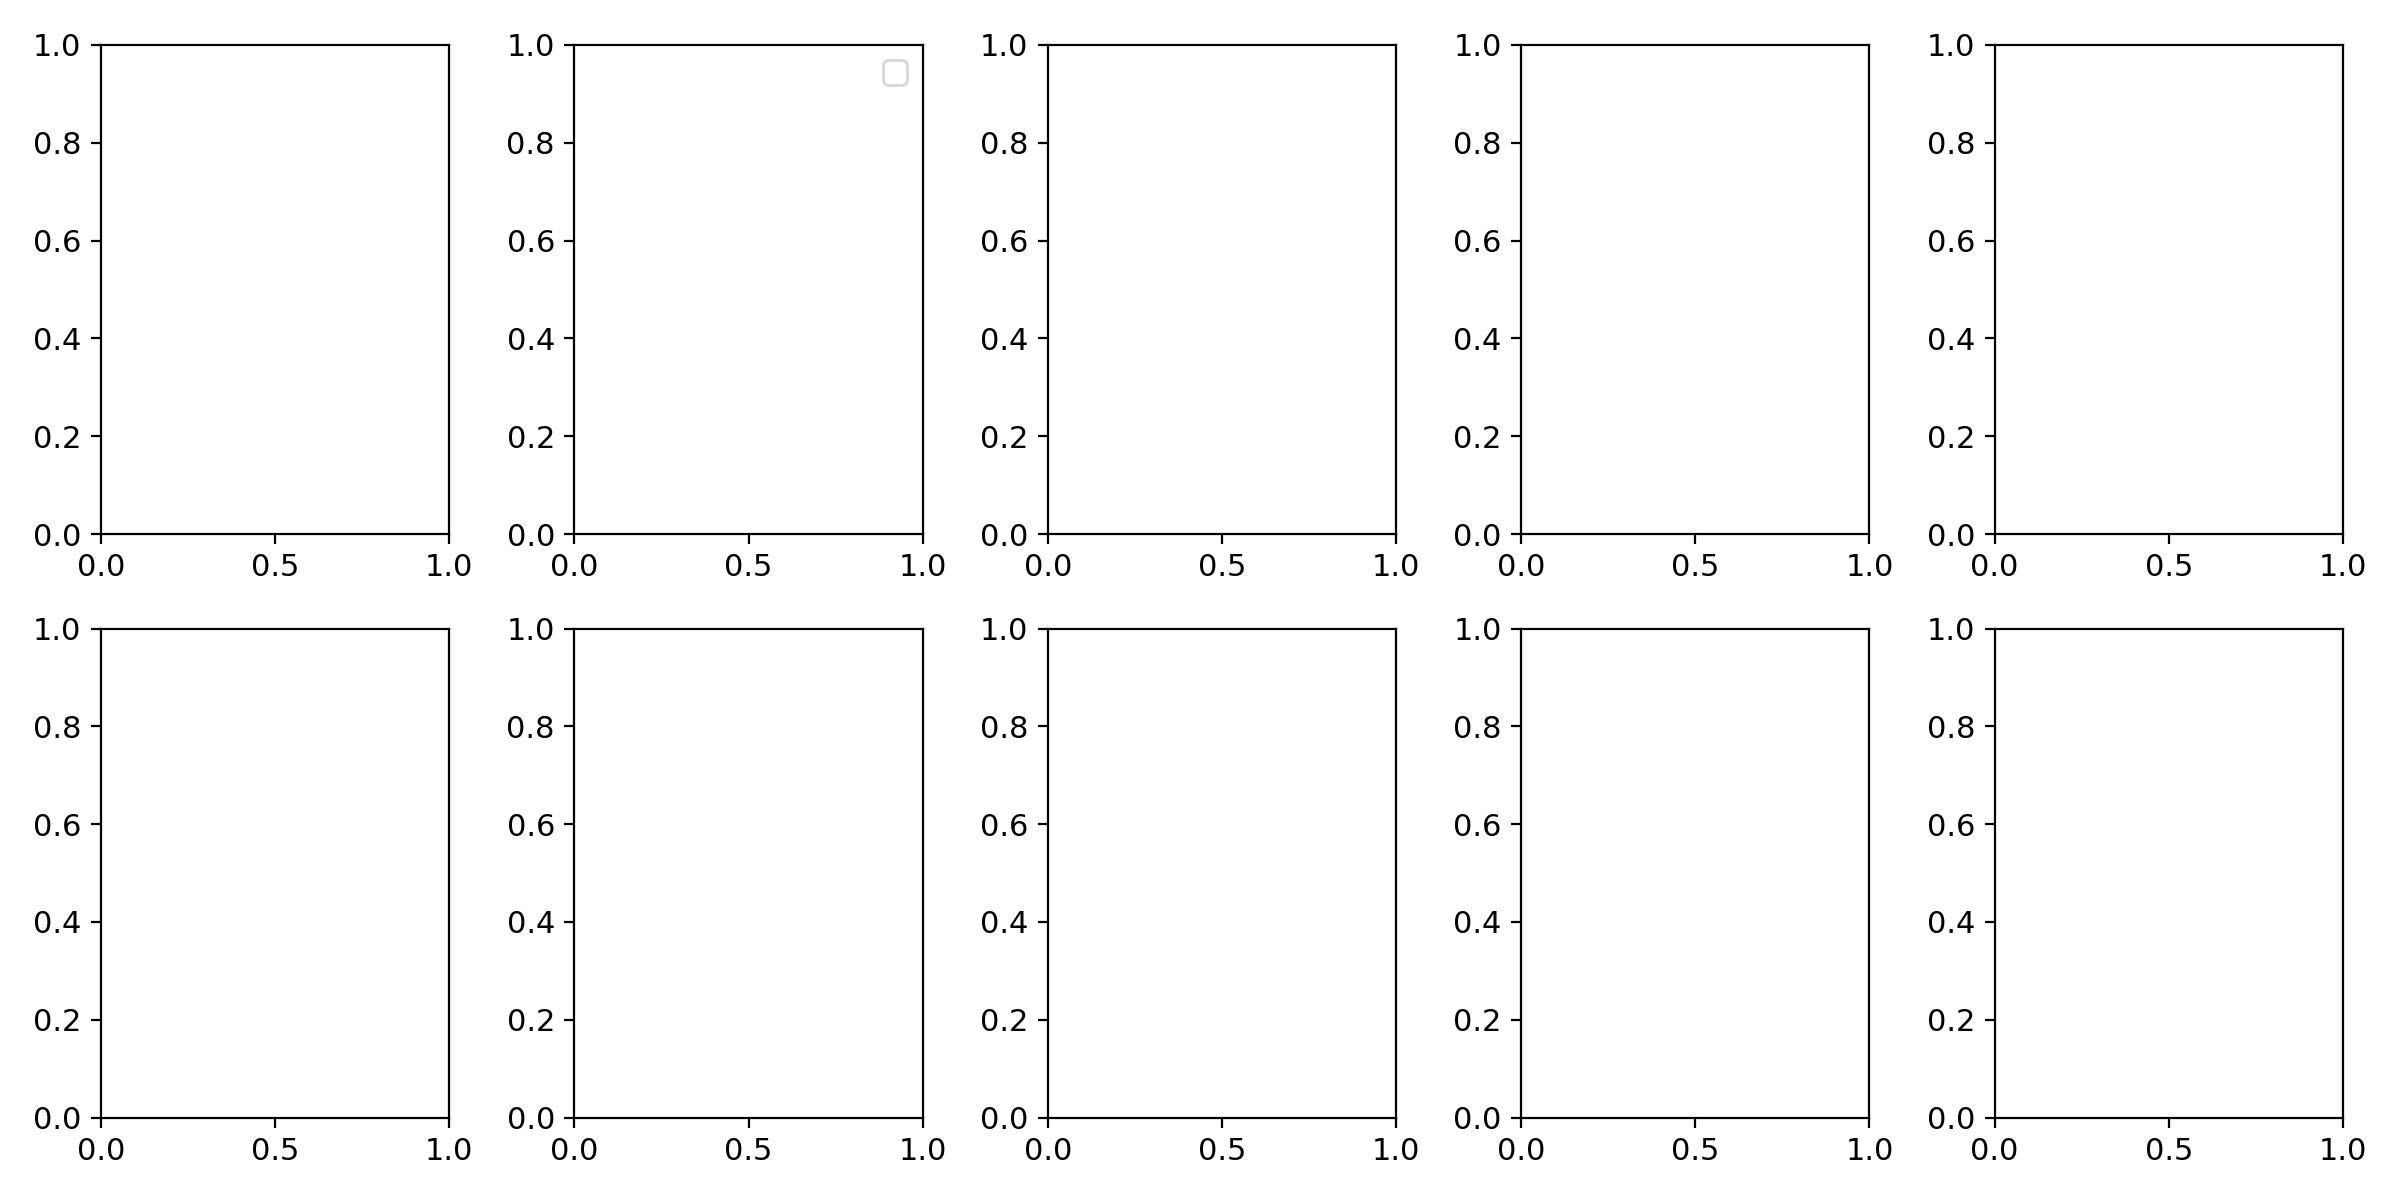

In [0]:
!python3 train.py --data data/coco_16img.data --batch-size 16 --accumulate 1 --nosave && mv results.txt results_coco_16img.txt  # CUSTOM TRAINING EXAMPLE
!python3 train.py --data data/coco_64img.data --batch-size 16 --accumulate 1 --nosave && mv results.txt results_coco_64img.txt 
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image(filename='results.png', width=800)

Extras below

---




In [0]:
!git pull

Already up to date.


In [0]:
%cd yolov3

[Errno 2] No such file or directory: 'yolov3'
/content/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3


In [0]:
%ls

cfg/       Dockerfile      models.py*    README.md*         runs/     utils/
data/      examples.ipynb  output/       requirements.txt*  test.py   weights/
detect.py  LICENSE         __pycache__/  results.png        train.py


In [0]:
# Unit Tests
!python3 detect.py  # detect 2 persons, 1 tie
!python3 test.py --data data/coco_32img.data  # test mAP = 0.8
!python3 train.py --data data/coco_32img.data --epochs 3 --nosave  # train 3 epochs

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

image 1/4 data/samples/D0F7CB29-5A7D-49FA-B576-960D1C27B9C9.jpeg: 288x416 7 persons, 2 cars, 2 trucks, 1 traffic lights, 4 backpacks, Done. (0.045s)
image 2/4 data/samples/F718583B-C29C-4F28-AB3D-8B9D19B6E32C.jpeg: 288x416 2 persons, 1 buss, 9 trucks, 1 boats, Done. (0.035s)
image 3/4 data/samples/bus.jpg: 416x320 4 persons, 1 buss, Done. (0.035s)
image 4/4 data/samples/zidane.jpg: 256x416 2 persons, 1 ties, Done. (0.031s)
Results saved to /content/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/yolov3/output
Done. (0.484s)
Namespace(batch_size=32, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data

In [0]:
# Evolve Hyperparameters
!python3 train.py --data data/coco.data --img-size 320 --epochs 1 --evolve